In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
all_working_list = ['3J95', '3J96', '5GRS', '5HNY', 
                    '5WCB', '6ACG', '6IRF', '6N1Q', 
                    '6N7G', '6R7I', '6UBY', '6UC0']


In [3]:
def get_time_df_list(runs):
    """Takes a list of runs and wil return a list of dfs"""
    
    df_list = []
    for run in runs:
        file = "analysis/analysis_{}/runtime.csv".format(run)
        df = pd.read_csv(file, index_col = "structure")
        df_list.append(df)
    return df_list
        
        
        
runs =[
    "run-no-ambig", "run-with-ambig", "run-general-ambig",
    "run-no-ambig-0.05-expand", "run-with-ambig-0.05-expand", "run-general-ambig-0.05-expand",
    "run-no-ambig-0.2-expand", "run-with-ambig-0.2-expand", "run-general-ambig-0.2-expand"
]    
time_df_list = get_time_df_list(runs)

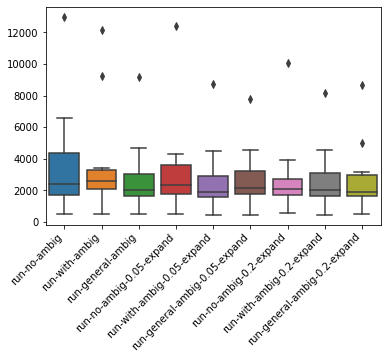

In [13]:
ref_df = time_df_list[2].loc[all_working_list]
time_df = pd.DataFrame()
for df in time_df_list:
    df = df.loc[all_working_list]
    time_df = pd.concat([time_df, df["time_it1"]], axis=1, sort=False)
    
time_df.columns = runs
plot = sns.boxplot(data=time_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha="right")

plt.show()

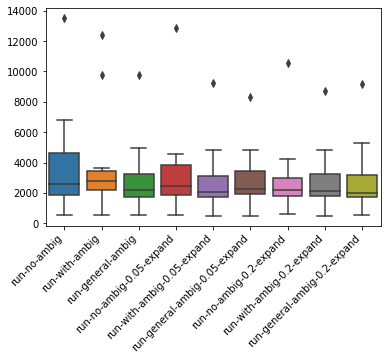

In [10]:
ref_df = time_df_list[2].loc[all_working_list].sum(axis=1)
time_df = pd.DataFrame()
for df in time_df_list:
    df = df.loc[all_working_list].sum(axis=1)
    time_df = pd.concat([time_df, df], axis=1, sort=False)
    
time_df.columns = runs
plot = sns.boxplot(data=time_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha="right")

plt.show()

run-no-ambig                     3613.522900
run-with-ambig                   3640.283583
run-general-ambig                2796.414892
run-no-ambig-0.05-expand         3239.843050
run-with-ambig-0.05-expand       2621.839167
run-general-ambig-0.05-expand    2788.240042
run-no-ambig-0.2-expand          2725.831442
run-with-ambig-0.2-expand        2667.599467
run-general-ambig-0.2-expand     2675.373783
dtype: float64


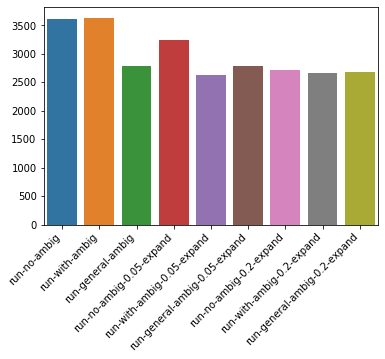

In [12]:
ref_df = time_df_list[2].loc[all_working_list]
time_df = pd.DataFrame()
for df in time_df_list:
    df = df.loc[all_working_list]
    time_df = pd.concat([time_df, df["time_it1"]], axis=1, sort=False)
    
time_df.columns = runs
all_time = time_df.sum()/len(all_working_list)
print(all_time)

plot = sns.barplot(x = runs, y = all_time)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha="right")
plt.show()